### This file plots the processed csv files with matplotlib

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import pandas as pd

## Adjust date of processed csv files

In [2]:
date = '2018-11-09_13h02'
worker_list = [8,16,32,64]
base_path = '/Users/florianmorath/Desktop/ASL_project/scripts/3_ThroughputForWrites/processed_data/' + date + '/'

## Throughput plot for write loads

In [3]:
# read data into pandas dataframe
df_tp = pd.read_csv(base_path + 'full_write_mw_tp.csv')
df_tp

,client,worker,write_tp_mean,write_tp_std
0,6,8,3250.019048,46.921663
1,6,16,3264.114286,40.795229
2,6,32,3270.285714,36.097170
3,6,64,3327.504762,28.547781
4,24,8,8304.466667,100.641007
5,24,16,8498.238095,98.976829
6,24,32,8414.190476,70.004335
7,24,64,8335.228571,66.697358
8,48,8,9037.752381,46.574767
9,48,16,9920.252381,713.507250


In [4]:
def y_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val)/1000000
        return str(val).rstrip('0') + ' M'
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return str(val).rstrip('0') + ' k'
    else:
        return tick_val

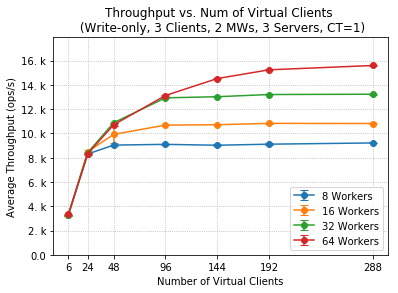

In [5]:
f = plt.figure()
plt.title("Throughput vs. Num of Virtual Clients \n (Write-only, 3 Clients, 2 MWs, 3 Servers, CT=1)")

for worker in worker_list:
    # extract values of interest
    df_tp_cut = df_tp[(df_tp.worker == worker)]
    
    vcs = df_tp_cut['client']
    tps = df_tp_cut['write_tp_mean']
    std = df_tp_cut['write_tp_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Throughput (ops/s)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0,top=8e3+np.mean(df_tp['write_tp_mean']))
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/3_ThroughputForWrites/processed_data/"+date+"/full_write_mw_tp_write.png", dpi = 150)


## Response-time plot for write loads

In [6]:
# read data into pandas dataframe
df_rt = pd.read_csv(base_path + 'full_write_mw_rt.csv')
df_rt

,client,worker,write_rt_mean,write_rt_std
0,6,8,1.175137,0.019507
1,6,16,1.157673,0.030993
2,6,32,1.160364,0.027172
3,6,64,1.132685,0.015498
4,24,8,2.280990,0.021343
5,24,16,2.187303,0.020708
6,24,32,2.230066,0.015132
7,24,64,2.234401,0.010403
8,48,8,4.696299,0.035000
9,48,16,3.482564,0.508462


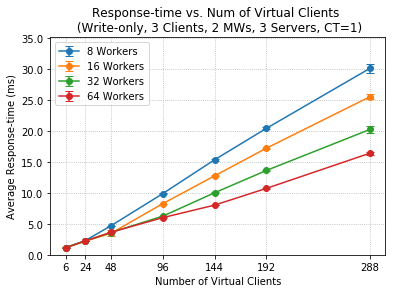

In [7]:
f = plt.figure()
plt.title("Response-time vs. Num of Virtual Clients \n (Write-only, 3 Clients, 2 MWs, 3 Servers, CT=1)")

for worker in worker_list:
    # extract values of interest
    df_rt_cut = df_rt[(df_rt.worker == worker)]
    
    vcs = df_rt_cut['client']
    tps = df_rt_cut['write_rt_mean']
    std = df_rt_cut['write_rt_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Response-time (ms)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_rt['write_rt_mean'])+5)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/3_ThroughputForWrites/processed_data/"+date+"/full_write_rt_write.png", dpi = 150)


## Queue length plot for write loads

In [8]:
# read data into pandas dataframe
df_ql = pd.read_csv(base_path + 'full_write_mw_queuelength.csv')
df_ql

,client,worker,write_queueLength,write_queueLength_std
0,6,8,1.244089,0.017761
1,6,16,1.227137,0.048977
2,6,32,1.202023,0.019362
3,6,64,1.198488,0.021205
4,24,8,2.161295,0.009866
5,24,16,2.327928,0.051200
6,24,32,2.302023,0.025254
7,24,64,2.187684,0.013960
8,48,8,11.997936,0.052834
9,48,16,3.448276,0.347738


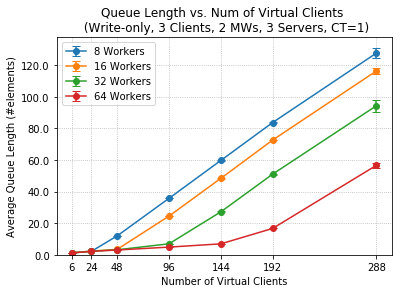

In [9]:
f = plt.figure()
plt.title("Queue Length vs. Num of Virtual Clients \n (Write-only, 3 Clients, 2 MWs, 3 Servers, CT=1)")

for worker in worker_list:
    # extract values of interest
    df_ql_cut = df_ql[(df_ql.worker == worker)]
    
    vcs = df_ql_cut['client']
    tps = df_ql_cut['write_queueLength']
    std = df_ql_cut['write_queueLength_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Queue Length (#elements)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_ql['write_queueLength'])+10)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/3_ThroughputForWrites/processed_data/"+date+"/full_write_mw_queuelength_write.png", dpi = 150)


## Response-time breakdown histogram for write loads

In [21]:
# read data into pandas dataframe
df_b = pd.read_csv(base_path + 'full_write_mw_rt_breakdown.csv')
df_b

,client,worker,write_netthreadTime,write_queueTime,write_workerPreTime,write_memcachedRTT,write_workerPostTime
0,6,8,0.024282,0.082844,0.012082,1.028012,0.027916
1,6,16,0.024574,0.078047,0.012765,1.013565,0.028722
2,6,32,0.025226,0.077552,0.013128,1.015912,0.028546
3,6,64,0.025225,0.079264,0.013327,0.987554,0.027315
4,24,8,0.022985,0.542074,0.011955,1.670361,0.033615
5,24,16,0.023806,0.135292,0.015149,1.978017,0.035040
6,24,32,0.022156,0.134117,0.013938,2.026547,0.033308
7,24,64,0.024981,0.131149,0.015750,2.026624,0.035899
8,48,8,0.021594,2.916850,0.011608,1.707887,0.038360
9,48,16,0.027685,0.798143,0.019794,2.586879,0.050062


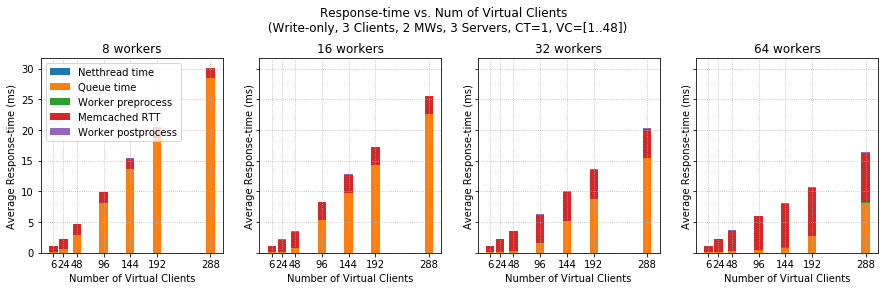

In [22]:
#f = plt.figure()
f, ax = plt.subplots(1, len(worker_list), sharex='col', sharey='row')
f.suptitle("Response-time vs. Num of Virtual Clients \n (Write-only, 3 Clients, 2 MWs, 3 Servers, CT=1, VC=[1..48])")
f.subplots_adjust(top=0.8)
f.set_figwidth(15)


i=0
for worker in worker_list:
    # extract values of interest
    df_b_cut = df_b[(df_b.worker == worker)]
    
    vcs = df_b_cut['client']
    net_time = df_b_cut['write_netthreadTime']
    queue_time = df_b_cut['write_queueTime']
    workerPreTime = df_b_cut['write_workerPreTime']
    memcachedRTT = df_b_cut['write_memcachedRTT']
    workerPostTime = df_b_cut['write_workerPostTime']

    width = 15       # the width of the bars: can also be len(x) sequence
    ax[i].bar(vcs, net_time, width, label='Netthread time')
    ax[i].bar(vcs, queue_time, width, bottom=net_time, label='Queue time')
    ax[i].bar(vcs, workerPreTime, width, bottom=net_time+queue_time, label='Worker preprocess')
    ax[i].bar(vcs, memcachedRTT, width, bottom=net_time+queue_time+workerPreTime, label='Memcached RTT')
    ax[i].bar(vcs, workerPostTime, width, bottom=net_time+queue_time+workerPreTime+memcachedRTT, label='Worker postprocess')

    ax[i].grid(linestyle = "dotted")
    ax[i].set_ylabel("Average Response-time (ms)")
    ax[i].set_xlabel("Number of Virtual Clients")
    ax[i].set_xticks([0] + np.array(vcs))
    ax[i].set_ylim(bottom=0)
    ax[i].set_title('{} workers'.format(worker))
    if i==0:
        ax[i].legend()
    
    i += 1

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/3_ThroughputForWrites/processed_data/"+date+"/full_write_mw_rt_breakdown_write.png", dpi = 150)


## Time in front of net-thread plot for write loads

In [11]:
# read data into pandas dataframe
df_rt_mw = pd.read_csv(base_path + 'full_write_mw_rt.csv')
df_rt_mw = df_rt_mw[df_rt_mw['client'] <= 192]
df_rt_mem = pd.read_csv(base_path + 'full_write_mem_rt.csv')
df_rt_mem = df_rt_mem[df_rt_mem['client'] <= 192]
print(df_rt_mw)
df_rt = df_rt_mw
df_rt['write_rt_mean'] = df_rt_mem['write_rt_mean']-df_rt_mw['write_rt_mean']
print(df_rt)

    client  worker  write_rt_mean  write_rt_std
0        6       8       1.175137      0.019507
1        6      16       1.157673      0.030993
2        6      32       1.160364      0.027172
3        6      64       1.132685      0.015498
4       24       8       2.280990      0.021343
5       24      16       2.187303      0.020708
6       24      32       2.230066      0.015132
7       24      64       2.234401      0.010403
8       48       8       4.696299      0.035000
9       48      16       3.482564      0.508462
10      48      32       3.605251      0.008315
11      48      64       3.641451      0.014806
12      96       8       9.897347      0.067758
13      96      16       8.271876      0.002315
14      96      32       6.251601      0.028352
15      96      64       6.007902      0.034166
16     144       8      15.370357      0.167947
17     144      16      12.773643      0.057670
18     144      32      10.029873      0.066064
19     144      64       8.033575      0

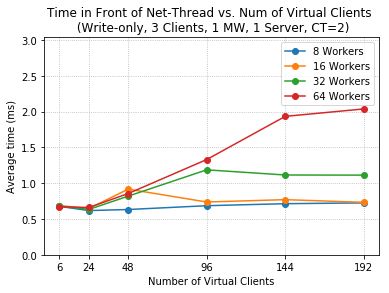

In [12]:
f = plt.figure()
plt.title("Time in Front of Net-Thread vs. Num of Virtual Clients \n (Write-only, 3 Clients, 1 MW, 1 Server, CT=2)")

for worker in worker_list:
    # extract values of interest
    df_rt_cut = df_rt[(df_rt.worker == worker)]
    
    vcs = df_rt_cut['client']
    tps = df_rt_cut['write_rt_mean']
    #std = df_rt_cut['read_rt_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = None, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average time (ms)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_rt['write_rt_mean'])+1)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
#f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_rt_write_front_netthread.png", dpi = 150)